In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from fractions import Fraction
import os

In [9]:
df = pd.read_csv("/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1/user_id_24026/user_id_24026.csv", sep=',', index_col=None)
df.head(10)

,User ID,Filename,Camera View,Activity Type,Start Time,End Time,Label/Class ID,Appearance Block
0,24026,Dashboard_User_id_24026_3,Dashboard,Distracted,0:00:00,0:00:07,NaN,None
1,,,Dashboard,Distracted,0:00:08,0:00:31,10,None
2,,,Dashboard,Distracted,0:00:41,0:00:59,9,None
3,,,Dashboard,Distracted,0:01:09,0:01:26,0,None
4,,,Dashboard,Distracted,0:01:36,0:02:00,3,None
5,,,Dashboard,Distracted,0:02:10,0:02:27,1,None
6,,,Dashboard,Distracted,0:02:37,0:02:59,12,None
7,,,Dashboard,Distracted,0:03:09,0:03:24,2,None
8,,,Dashboard,Distracted,0:03:34,0:03:58,8,None
9,,,Dashboard,Distracted,0:04:08,0:04:32,7,None


In [126]:
def preprocess_csv(x):
    x.Filename = str(x.Filename).strip()
    x.Filename = np.NaN if x.Filename == '' else x.Filename

    st_split, et_split = str(x.loc['Start Time']).split(':'), str(x.loc['End Time']).split(':')
    x.loc['Start Time'] = int(st_split[0])*3600 + int(st_split[1])*60 + int(st_split[2])
    x.loc['End Time'] = int(et_split[0])*3600 + int(et_split[1])*60 + int(et_split[2])
    try:
        x.loc['Label/Class ID'] = int(x.loc['Label/Class ID'])
    except:
        x.loc['Label/Class ID'] = np.NaN
    return x

In [127]:
df.apply(preprocess_csv, axis=1) # Preprocess csv for NaN removal, and time processing
df.Filename = df.Filename.fillna(method='ffill') # Fill the filenames
df.dropna(inplace=True) # Drop non labeled data
df.to_csv('/tmp/labels.csv')

In [123]:
df.Filename = df.Filename.fillna(method='ffill')

In [124]:
df

,User ID,Filename,Camera View,Activity Type,Start Time,End Time,Label/Class ID,Appearance Block
0,24026,Dashboard_User_id_24026_3,Dashboard,Distracted,0,7,NaN,None
1,,Dashboard_User_id_24026_3,Dashboard,Distracted,8,31,10,None
2,,Dashboard_User_id_24026_3,Dashboard,Distracted,41,59,9,None
3,,Dashboard_User_id_24026_3,Dashboard,Distracted,69,86,0,None
4,,Dashboard_User_id_24026_3,Dashboard,Distracted,96,120,3,None
...,...,...,...,...,...,...,...,...
113,,Right_side_window_User_id_24026_4,Rightside_window,Distracted,443,461,15,Sunglass
114,,Right_side_window_User_id_24026_4,Rightside_window,Distracted,471,489,13,Sunglass
115,,Right_side_window_User_id_24026_4,Rightside_window,Distracted,499,521,11,Sunglass
116,,Right_side_window_User_id_24026_4,Rightside_window,Distracted,531,546,4,Sunglass


In [105]:
df.loc[df.Filename.values == 'Dashboard_User_id_24026_3']

,User ID,Filename,Camera View,Activity Type,Start Time,End Time,Label/Class ID,Appearance Block
0,24026,Dashboard_User_id_24026_3,Dashboard,Distracted,0,7,NaN,None
1,,Dashboard_User_id_24026_3,Dashboard,Distracted,8,31,10,None
2,,Dashboard_User_id_24026_3,Dashboard,Distracted,41,59,9,None
3,,Dashboard_User_id_24026_3,Dashboard,Distracted,69,86,0,None
4,,Dashboard_User_id_24026_3,Dashboard,Distracted,96,120,3,None
5,,Dashboard_User_id_24026_3,Dashboard,Distracted,130,147,1,None
6,,Dashboard_User_id_24026_3,Dashboard,Distracted,157,179,12,None
7,,Dashboard_User_id_24026_3,Dashboard,Distracted,189,204,2,None
8,,Dashboard_User_id_24026_3,Dashboard,Distracted,214,238,8,None
9,,Dashboard_User_id_24026_3,Dashboard,Distracted,248,272,7,None


In [108]:
df.dropna(inplace=True)

In [113]:
time_patches = np.array(df.loc[:, ['Start Time', 'End Time']], dtype = int)
labels = np.array(df.loc[:, 'Label/Class ID'], dtype=float)

In [115]:
frame_rate = 1/30.
frame_ids = []
for time_patch, label in zip(time_patches, labels):
    frame_ids += [np.arange(int(time_patch[0]/frame_rate), int(time_patch[1]/frame_rate)+1)]

In [116]:
frame_ids

[array([240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
        266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
        279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
        292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
        305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
        318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
        331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
        344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
        357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
        370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
        383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
        396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
        409, 410, 411, 412, 413, 414, 415, 416, 417

In [44]:
df.to_csv("../../datasets/user_id_24026_processed.csv")

In [73]:
file_names = np.array(df.Filename[df.Filename != ' '].values, dtype=str)
# file_names = np.array([name.strip() for name in file_names], dtype=str)
# file_names

In [74]:
vid = [x.split('_')[-1] for x in file_names]

In [117]:
uvid = np.unique(vid)
uvid

array(['3', '4'], dtype='<U1')

In [76]:
data_views_list = [file_names[tr_val] for tr_val in np.array([uvid]).T == np.array([vid])]

In [118]:
data_views_list

[array(['Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Dashboard_User_id_24026_3', 'Dashboard_User_id_24026_3',
        'Rear_view_User_id_24026_3', 'Rear_view_User_id_24026_3',
        'Rear_view_User_id_24026_3', 'Rear_view_User_id_24026_3',
        'Rear_view_User_id_24026_3', 'Rear_view_User_id_24026_3',
        'Rear_view_User_id_24026_3', 'Rear_view_User_id_24026_3',
        'Rear_view_User_id_24026_3', 'Rear_view_User_id_24026_3',
        'R

In [ ]:
np.unique(df..values)

In [1]:
import ffmpeg

In [2]:
def read_frame_as_numpy(in_filename, frame_num):
    out, err = (
        ffmpeg
        .input(in_filename)
        .filter('select', 'gte(n,{})'.format(frame_num))
        .output('pipe:', vframes=1, format='rawvideo', pix_fmt='gray')
        .run(capture_stdout=True)
    )
    return out

In [3]:
# frame = read_frame_as_jpeg("../../datasets/Dashboard_user_id_24491_NoAudio_0.MP4", 10)
probe = ffmpeg.probe("/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1/user_id_35133/Dashboard_User_id_35133_0.MP4")
video_info = next(s for s in probe['streams'] if s['codec_type'] == 'video')
width = int(video_info['width'])
height = int(video_info['height'])
num_frames = int(video_info['nb_frames'])
frame_rate = float(Fraction(video_info['avg_frame_rate']))

Error: ffprobe error (see stderr output for detail)

In [15]:
print(f'video_info:\n\t{video_info}, \n\nFrame size:\t{(height, width)}, \n\nNum Frames:\t{num_frames}, \n\nFraction:\t{frame_rate}')

video_info:
	{'index': 0, 'codec_name': 'h264', 'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10', 'profile': 'High', 'codec_type': 'video', 'codec_time_base': '1/60', 'codec_tag_string': 'avc1', 'codec_tag': '0x31637661', 'width': 1920, 'height': 1080, 'coded_width': 1920, 'coded_height': 1088, 'has_b_frames': 0, 'pix_fmt': 'yuv420p', 'level': 51, 'chroma_location': 'left', 'refs': 1, 'is_avc': 'true', 'nal_length_size': '4', 'r_frame_rate': '30/1', 'avg_frame_rate': '30/1', 'time_base': '1/60000', 'start_pts': 0, 'start_time': '0.000000', 'duration_ts': 40800000, 'duration': '680.000000', 'bit_rate': '11878673', 'bits_per_raw_sample': '8', 'nb_frames': '20400', 'disposition': {'default': 1, 'dub': 0, 'original': 0, 'comment': 0, 'lyrics': 0, 'karaoke': 0, 'forced': 0, 'hearing_impaired': 0, 'visual_impaired': 0, 'clean_effects': 0, 'attached_pic': 0, 'timed_thumbnails': 0}, 'tags': {'language': 'eng', 'handler_name': '\x0cVideoHandler'}}, 

Frame size:	(1080, 1920), 

Nu

In [41]:
# out, err = (
#     ffmpeg
#     .input('../../datasets/Dashboard_user_id_24491_NoAudio_0.MP4')
#     .output('pipe:', format='rawvideo', pix_fmt='rgb24')
#     .run(capture_stdout=True)
# )
# video = (
#     np
#     .frombuffer(out, np.uint8)
#     .reshape([-1, height, width, 3])
# )
frame = read_frame_as_jpeg("../../datasets/Dashboard_user_id_24491_NoAudio_0.MP4", 10)
np_frame = np.frombuffer(frame, np.uint8).reshape([height, width])

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

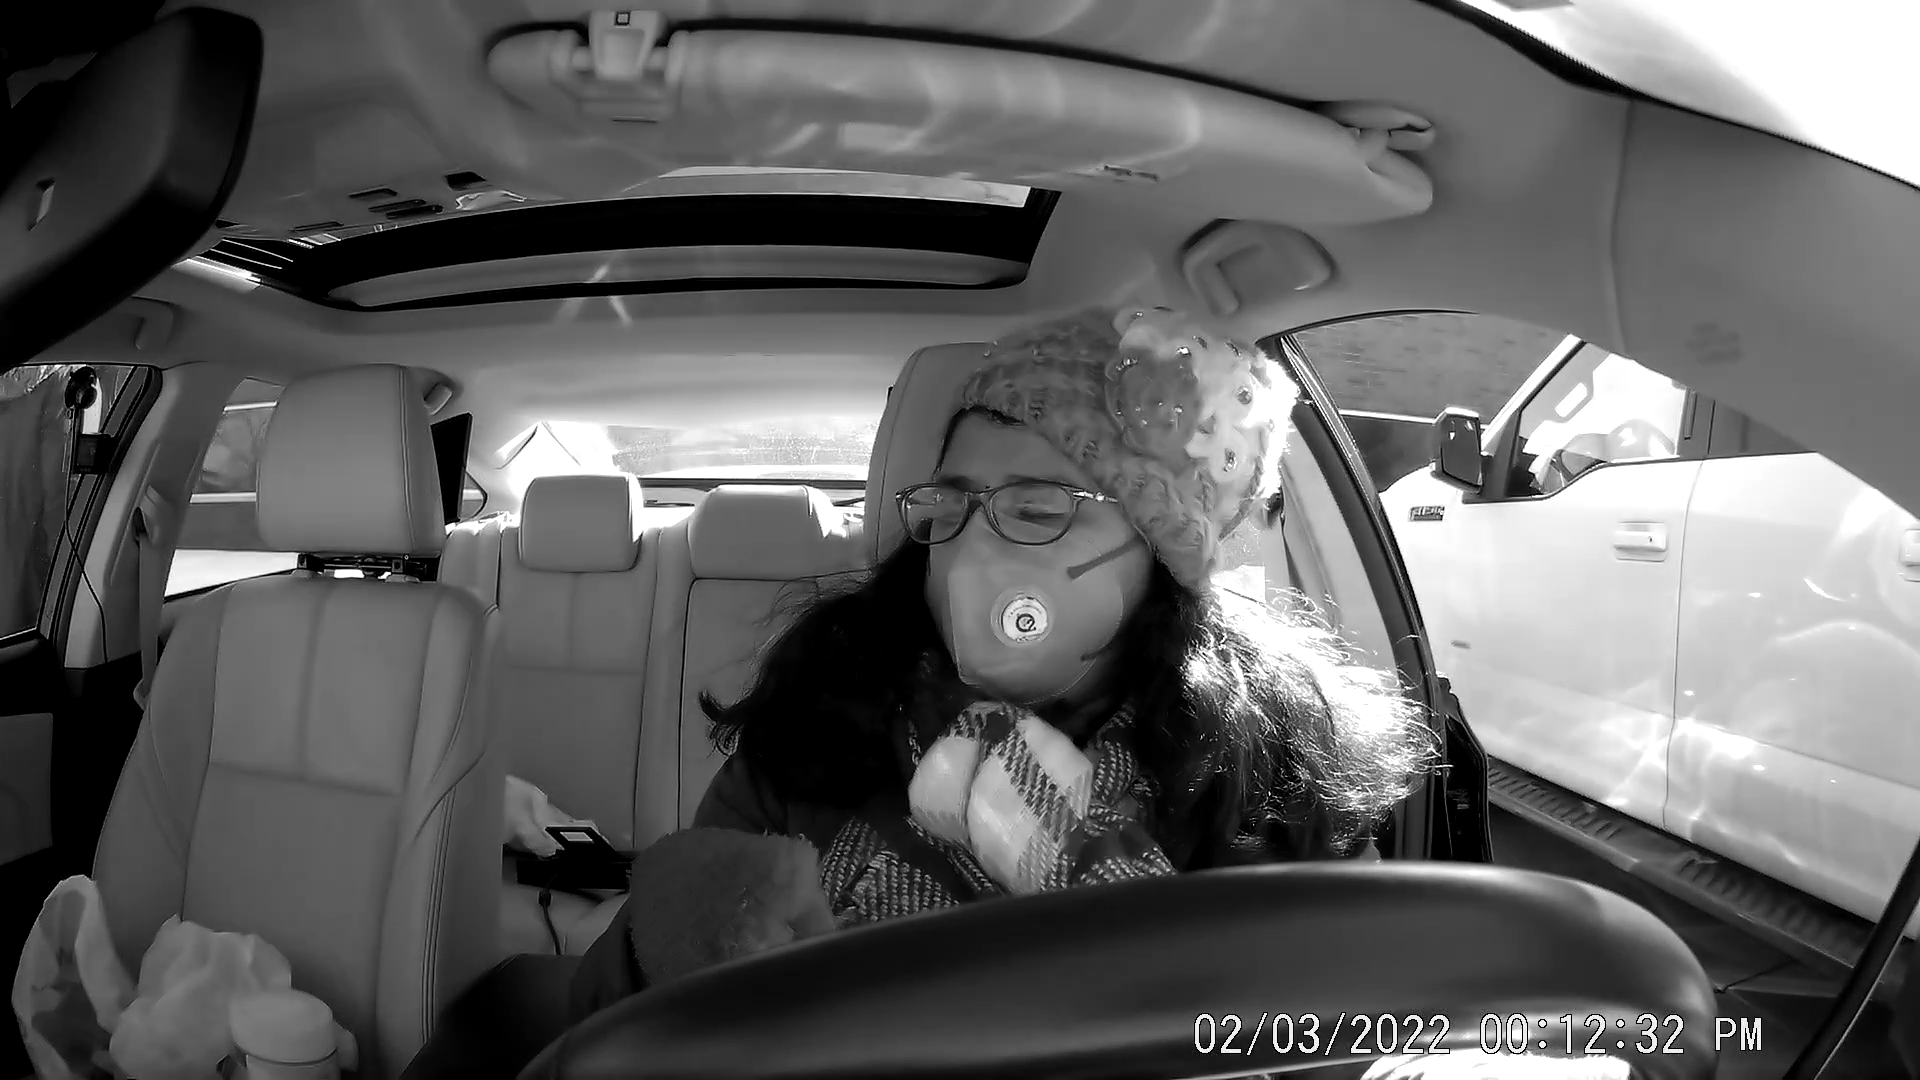

In [42]:
img = Image.fromarray(np_frame)
img

In [43]:
def preprocess_csv(x):
    x.Filename = np.NaN if x.Filename == ' ' else x.Filename
    st_split, et_split = str(x.loc['Start Time']).split(':'), str(x.loc['End Time']).split(':')
    x.loc['Start Time'] = int(st_split[0])*3600 + int(st_split[1])*60 + int(st_split[2])
    x.loc['End Time'] = int(et_split[0])*3600 + int(et_split[1])*60 + int(et_split[2])
    return x

In [23]:
def dump_to_session_id_format(root:str = "../../datasets/2022/", 
                              target:str = "../../datasets/aicity/session_id_format"):
    labeled_dir = os.path.join(root, 'A1') # Source labeled data path
    unlabeled_dir = os.path.join(root, 'A2') # Source unlabeled data path
    test_dir = os.path.join(root, 'B') # Source test data path
    
    os.makedirs(target, exist_ok=True) # Create the target directory, escape if already exists
    
    # Dumping labeled data
    user_ids_a1 = os.listdir(labeled_dir) # Get the user_id dirs list
    
    # Process each user id
    for id_ in user_ids_a1:
        id_dir = os.path.join(labeled_dir, id_) # Path to user_id directory
        label_file = os.path.join(id_dir, id_+'.csv') # labels file path
        labels = pd.read_csv(label_file) # Read the labels file
        labels.apply(preprocess_csv) # Preprocess csv for NaN removal, and time processing
        
        vid_file_names = labels.Filename[df.Filename != ' '].values # Get the video file names
        vid_file_names = np.array([name.strip() for name in vid_file_names], dtype=str) # Trim and cast to numpy
        vid = [x.split('_')[-1] for x in file_names] # Get session ids
        uvid = np.unique(vid) # Get unique session ids
        
        # get file_names corresponding to each session_id
        # row repressents .MP4 file_names for each session_id
        vid_file_names = [vid_file_names[s_match_idx] for s_match_idx in np.array([uvid]).T == np.array([vid])]
        
        # Iterate through all the session ids and
        # Dump that session id into session_id/view/frame_id.jpg format
        for session_id, files in zip(uvid, vid_file_names):
            session_id_dir = os.path.join(target, session_id) # Session id directory path
            os.makedirs(session_id_dir, exist_ok=True) # create the directory
            
            # For each view
            for file in files:
                loc_labels = labels[labels.Filename == file] # Labels corresponding to the view and session_id
                cam_views = np.unique(loc_labels.loc[:, 'Camera View'].values)
                assert(len(cam_views) == 1)
                
                
                view_target_folder_path = os.path.join(session_id_dir, str(cam_views[0]))
                view_video_path = os.path.join(id_dir, str(file)+'.MP4')
                
                # Get video information
                probe = ffmpeg.probe(view_video_path) # probe the video
                video_info = next(s for s in probe['streams'] if s['codec_type'] == 'video') # get video information
                
                # Get video information


In [18]:
dump_to_session_id_format()

['Distracted_Activity_Class_definition.txt', 'README.txt', 'A1', 'A2']


In [22]:
os.makedirs("../../datasets/aicity/session_id_format", exist_ok=True)

In [8]:
import cv2

In [20]:
vid_view = cv2.VideoCapture("../../datasets/Dashboard_user_id_24491_NoAudio_0.MP4")

In [21]:
assert(vid_view.isOpened())

In [17]:
imgs = []
n_frames = 0
ret, frame = vid_view.read()
# Read until video is completed
while(ret):
    # Capture frame-by-frame
    ret, frame = vid_view.read()
    if (ret):
        n_frames += 1
        imgs += [cv2.resize(frame, (200, 200))]
#     print(frame)
#     break

vid_view.release()

In [18]:
imgs = np.array(imgs)
imgs.shape

(20399, 200, 200, 3)

In [22]:
vid_view.get(cv2.CAP_PROP_FPS)

30.0

In [23]:
from imutils.video import count_frames

In [24]:
count_frames("../../datasets/Dashboard_user_id_24491_NoAudio_0.MP4")

20400

In [25]:
vid_view.get(cv2.CAP_PROP_FRAME_COUNT)

20400.0

In [6]:
from dartorch.data.dump2images import dump_labels_to_session_id_format, preprocess_csv

In [7]:
dump_labels_to_session_id_format('/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/')

['user_id_24026']
user_id_24026
/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1/user_id_24026/user_id_24026.csv
    User ID                    Filename        Camera View Activity Type  \
0     24026   Dashboard_User_id_24026_3          Dashboard    Distracted   
1                                                Dashboard    Distracted   
2                                                Dashboard    Distracted   
3                                                Dashboard    Distracted   
4                                                Dashboard    Distracted   
..      ...                         ...                ...           ...   
113                                       Rightside_window    Distracted   
114                                       Rightside_window    Distracted   
115                                       Rightside_window    Distracted   
116                                       Rightside_window    Distracted   
117                                       Righ

In [24]:
import imageio

In [43]:
def _load_one_video_frame(reader, frame_no, n_frame = 1):
        """ Obtain a single frame from a video file.

        Parameters
        ----------
        frame_no: int
            The frame index for the required frame

        Returns
        ------
        :class:`numpy.ndarray`
            The image for the requested frame index,
        """
        reader.set_image_index(frame_no - n_frame)
        frame = [reader.get_next_data()[:, :, ::-1] for i in range(n_frame)]
        return frame 

In [44]:
# %%timeit
reader = imageio.get_reader('/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1/user_id_24026/Dashboard_User_id_24026_NoAudio_3.MP4', 'ffmpeg')

In [27]:
type(reader)

imageio.plugins.ffmpeg.FfmpegFormat.Reader

In [22]:
from sys import getsizeof
getsizeof(reader)

48

In [50]:
reader.get_meta_data()
# reader.get_length()

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2-static https://johnvansickle.com/ffmpeg/ built with gcc 8 (Debian 8.3.0-6)',
 'codec': 'h264',
 'pix_fmt': 'yuv420p',
 'fps': 30.0,
 'source_size': (1920, 1080),
 'size': (1920, 1080),
 'rotate': 0,
 'duration': 533.0}

In [52]:
# %%timeit
np.all(_load_one_video_frame(2)[-1] == _load_one_video_frame(0)[-1])

False

In [54]:
img = _load_one_video_frame(reader, -1, 10)[0].mean(axis=-1)

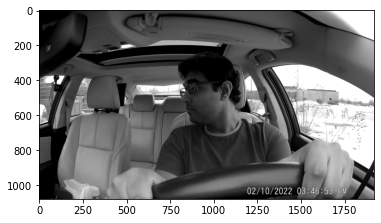

In [56]:
plt.imshow(img, 'gray')
plt.show()

In [48]:
f1 = _load_one_video_frame(533*30, 10)
f2 = _load_one_video_frame(533*30, 1)

IndexError: 15990

In [34]:
np.all(f1[-1] == f2[-1])

True

In [49]:
533*30

15990

In [7]:
label_df = pd.read_csv("/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1/user_id_24026/session_3/labels.csv", index_col=0)
video_label_df = pd.read_csv("/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1/user_id_24026/session_3/vid_files.csv", index_col=1)

In [16]:
type(video_label_df.loc['Dashboard'].values[0])

str

In [23]:
label_df.drop[label_df.iloc[:, 2] != -1]

TypeError: 'method' object is not subscriptable

In [11]:
from dartorch.data import DARDatasetOnVideos

In [12]:
dataset = DARDatasetOnVideos('/home/shivam/2021-22-2/ML4CE/Project/datasets/2022/A1', load_reader_instances = True)

user_id_35133/session_0
user_id_35133/session_2
user_id_24026/session_3
user_id_24026/session_4
user_id_38058/session_1
user_id_38058/session_0
user_id_24491/session_1
user_id_24491/session_0


In [18]:
data = dataset.__getitem__(142)

In [25]:
imgs = data[0].split(1, dim=0)

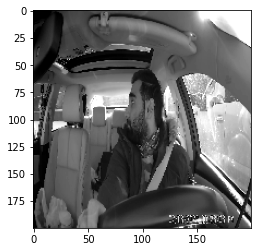

In [30]:
plt.imshow(imgs[0].numpy().squeeze(axis=0), 'gray')
plt.show()

In [8]:
import torch
from torch.nn.functional import interpolate

In [19]:
t = torch.rand((1, 1, 500, 600), dtype=torch.float32)

In [15]:
t_i = interpolate(t, (200, 200))

In [16]:
t_i.shape

torch.Size([1, 1, 200, 200])

In [18]:
t.unsqueeze(dim=0).shape

torch.Size([1, 1, 1, 500, 600])

In [20]:
t_l = [t]*10

In [22]:
t_lc = torch.cat(t_l, dim=0)

In [24]:
t_lc_l = [t_lc]*20

In [25]:
t_lc_lc = torch.cat(t_lc_l, dim=0)

In [26]:
t_lc_lc.shape

torch.Size([200, 1, 500, 600])

In [31]:
split_vec = torch.split(t_lc_lc, 10, dim=0)

In [32]:
split_vec[0].shape

torch.Size([10, 1, 500, 600])

In [34]:
split_vec

tuple